In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
dataset=pd.read_csv("C:\\Users\\laksh\Downloads\\archive (1)\\train.csv")

In [4]:
print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)


C:\Users\laksh\AppData\Local\Temp\ipykernel_55220\1766473692.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].median(), inplace=True)


In [6]:
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})

In [7]:
dataset = pd.get_dummies(dataset, columns=['Embarked'], drop_first=True)

In [9]:
features = dataset[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S','Survived']]

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)  
features.loc[:,'Cluster'] = kmeans.fit_predict(scaled_features)

In [17]:
print(features.head(20))

    Pclass  Sex   Age     Fare  Embarked_Q  Embarked_S  Survived  Cluster
0        3    0  22.0   7.2500       False        True         0        0
1        1    1  38.0  71.2833       False       False         1        1
2        3    1  26.0   7.9250       False        True         1        1
3        1    1  35.0  53.1000       False        True         1        1
4        3    0  35.0   8.0500       False        True         0        0
5        3    0  28.0   8.4583        True       False         0        2
6        1    0  54.0  51.8625       False        True         0        0
7        3    0   2.0  21.0750       False        True         0        0
8        3    1  27.0  11.1333       False        True         1        1
9        2    1  14.0  30.0708       False       False         1        1
10       3    1   4.0  16.7000       False        True         1        1
11       1    1  58.0  26.5500       False        True         1        1
12       3    0  20.0   8.0500       F

In [18]:
cluster_analysis = features.groupby('Cluster').mean()
print(cluster_analysis)

           Pclass       Sex        Age       Fare  Embarked_Q  Embarked_S  \
Cluster                                                                     
0        2.568519  0.127778  29.360963  18.221688         0.0    0.859259   
1        1.627737  0.762774  29.736314  65.080232         0.0    0.656934   
2        2.909091  0.467532  28.032468  13.276030         1.0    0.000000   

         Survived  
Cluster            
0        0.098148  
1        0.945255  
2        0.389610  


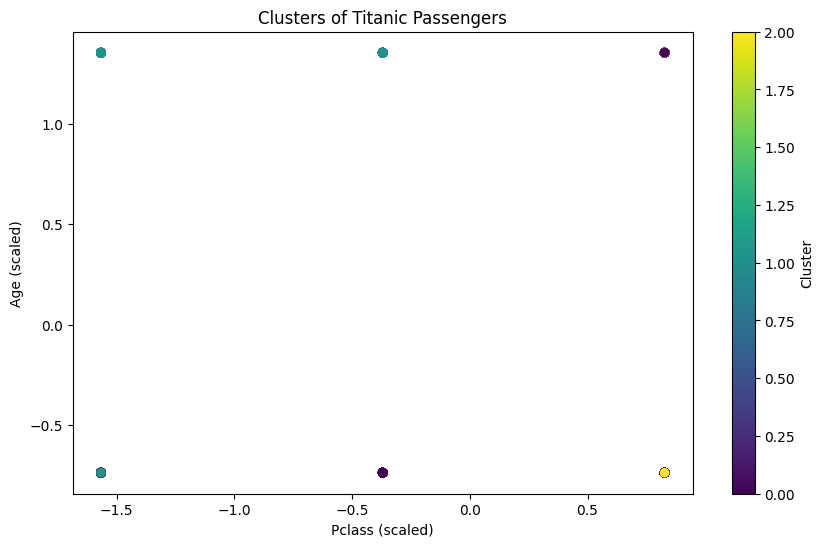

In [20]:
plot.figure(figsize=(10, 6))
plot.scatter(scaled_features[:, 0], scaled_features[:, 1], c=features['Cluster'], cmap='viridis')
plot.xlabel('Pclass (scaled)')
plot.ylabel('Age (scaled)')
plot.title('Clusters of Titanic Passengers')
plot.colorbar(label='Cluster')
plot.show()

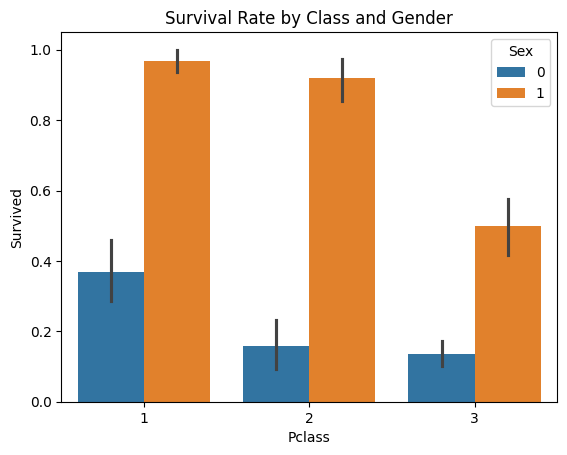

In [21]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=dataset)
plot.title('Survival Rate by Class and Gender')
plot.show()

In [24]:
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=[0, 18, 30, 50, 80], labels=['Child', 'YoungAdult', 'Adult', 'Senior'])

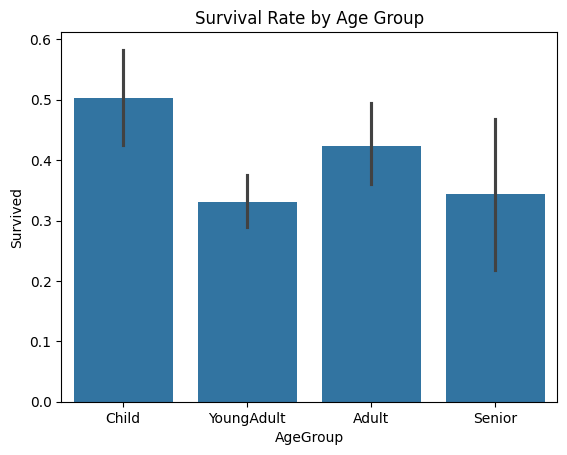

In [25]:
sns.barplot(x='AgeGroup', y='Survived', data=dataset)
plot.title('Survival Rate by Age Group')
plot.show()